# Apply Stastics

이 노트북에서는 데이터 분석에 활용되는 확률분포와 검정법에 대해서 이야기 할 것이다.

In [1]:
%matplotlib inline
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## QQplot

데이터가 정규분포 인지 아닌지 검정할 때 사용한다.

In [7]:
# 평균 0, 표준편차 1인 정규분포 생성
np.random.seed(0)
mu = 0
std = 1
rv = sp.stats.norm(mu,std)

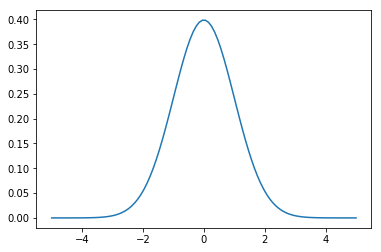

In [8]:
xx = np.linspace(-5,5,100)
plt.plot(xx,rv.pdf(xx))

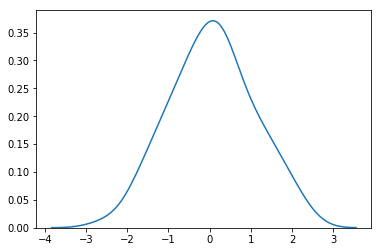

In [43]:
# 정규분포를 띄는 데이터 생성후 distplot 생성
np.random.seed(0)
x = np.random.randn(100)
sns.distplot(x,hist=None)

(-2.7082416219129732,
 2.7082416219129732,
 -2.809925965354195,
 2.8426693240883658)

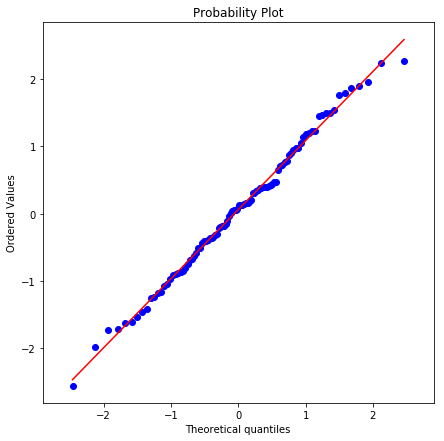

In [44]:
#QQplot 적용해서 정규분포인지 검정
plt.figure(figsize=(7,7))
sp.stats.probplot(x,plot=plt)
plt.axis("equal")

데이터의 분포가 QQplot과 거의 일치하므로 데이터가 정규분포 형태를 띠고 있다고 검정할 수 있다.

_____________________________________________________

데이터 분포가 정규분포가 아닐 경우

In [45]:
np.random.seed(0)
x = np.random.rand(100)

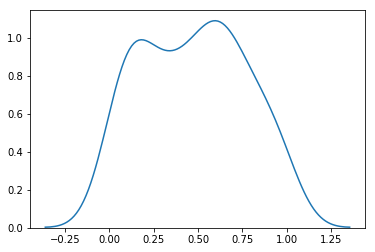

In [46]:
sns.distplot(x,hist=None)

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

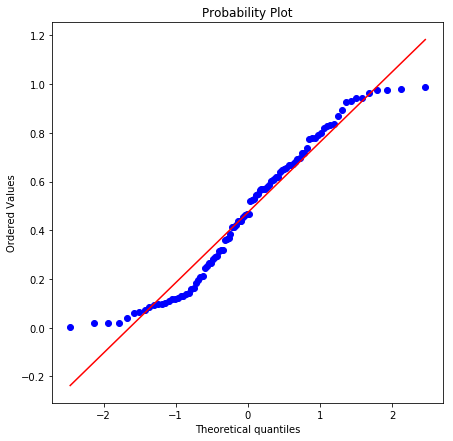

In [50]:
plt.figure(figsize=(7,7))
sp.stats.probplot(x,plot=plt)

데이터가 정규분포 형태가 아닐 경우 QQplot가 일치하지 않는다.

# 이항분포

속된 n번의 독립적 시행에서 각 시행이 확률 p를 가질 때의 이산 확률 분포이다. 이러한 시행은 베르누이 시행이라고 불리기도 한다. 사실, n=1일 때 이항 분포는 베르누이 분포이다.

In [51]:
#100번 독립적 시행에서 1/2 확률을 가질 때의 이산 확률분포 생성
N = 100
theta_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x)
n

49

In [6]:
#p-value확인
sp.stats.binom_test(n, N)

0.92041076261282062

P-value가 92%로 높으므로 귀무가설(확률: 0.5)을 가각할 수 없다.

In [53]:
N = 100
theta_0 = 0.35
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x)
n

31

In [54]:
sp.stats.binom_test(n, N)

0.00018314322488235352

p-value가 0.01%이므로 귀무가설 기각

## 카이 제곱 검정

각 범주 내 항목의 비율이 사용자가 지정하는 비율과 유의하게 다른지 여부를 확인하려면 카이-제곱 적합도 검정을 사용합니다. 여러 범주에 걸쳐 비율이 같은지(균일) 검정하거나, 각 범주에 다른 비율을 지정하거나, 각 범주에 과거 카운트를 지정할 수 있습니다.

In [62]:
#데이터 갯구 10개 각 수가 일어날 확률은 0.25
N = 10
k = 4
theta_0 = np.ones(k)/ k
print(theta_0)
np.random.seed(0)
x = np.random.choice(k,N,p=theta_0)
print(x)
n = np.bincount(x,minlength=4)
n

[ 0.25  0.25  0.25  0.25]
[2 2 2 2 1 2 1 3 3 1]


array([0, 3, 5, 2], dtype=int64)

In [19]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=5.1999999999999993, pvalue=0.157724450396663)

P-value가 15% 귀무가설(각 항목이 25%확률로 발생)을 기각할수 없다.

In [63]:
N = 100
k = 4
theta_0 = np.array([0.35,0.30,0.20,0.15])
np.random.seed(0)
x = np.random.choice(k,N,p=theta_0)
n = np.bincount(x,minlength=k)
n

array([37, 32, 20, 11], dtype=int64)

In [64]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=16.559999999999999, pvalue=0.00087034719789121269)

P-value가 유이수준 5%보다 낮기 때문에 귀무가설을 기각 할 수 있다.

## 단일 표본 z-검정(One sample z-test)

모집단의 표준 편차를 알고 있는 경우 모집단의 평균을 추정하고 목표값 또는 기준값과 비교하려면 1-표본 Z 검정을 사용합니다. 이 분석을 사용하여 다음 작업을 수행할 수 있습니다.

- 모집단 평균이 사용자가 지정한 귀무 가설에서의 평균과 다른지 여부 확인

- 모집단 모수를 포함할 가능성이 있는 값의 범위 계산

데이터 갯수  N=10 , 실제 모수  mu=0 인 경우 대해 단일 표본 z-검정 명령을 실시해 보자.

In [75]:
#단일 표본 z검정
def ztest_1samp(x, sigma2=1, mu=0):
    z = (x.mean() - mu)/ np.sqrt(sigma2/len(x))
    return z, 2 * sp.stats.norm().sf(np.abs(z))

In [73]:
N = 10
mu_0 = 0.0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)

In [76]:
ztest_1samp(x)

(2.3338341854824276, 0.019604406021683538)

P-value가 1.9%이므로 귀무가설을 기각할 수 있다. 하지만

In [51]:
N = 100
mu_0 = 0.0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)

In [71]:
ztest_1samp(x)

(0.59808015534484993, 0.54978645086241684)

P-value: 54% 

데이터의 갯수를 늘리면 귀무가설(모집단의 평균0)은 기각되지 않는다.

## 독립 표본 t-검정(Two-sample t-test)

독립적인 정규 분포에서 나온 두 개의 데이터 셋을 사용하여 두 정규 분포의 기댓값이 동일한지 검사한다.

두 정규 분포의 기댓값이  μ1=0 ,  μ2=0.5 로 다르고 분산은  σ1=σ2=1  으로 같으며 샘플의 수가  N1=N2=10 인 경우를 실행해 보자

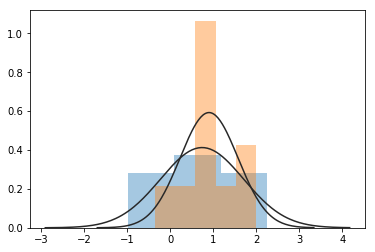

In [55]:
N_1 = 10; mu_1 = 0; sigma_1 = 1
N_2 = 10; mu_2 = 0.5; sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)

In [56]:
sp.stats.ttest_ind(x1,x2,equal_var=True)

Ttest_indResult(statistic=-0.41399685269886549, pvalue=0.68376768941164268)

유의 확률(p-value)이 68.4%이므로 귀무 가설을 기각할 수 없다. 따라서  μ1=μ2 이다. 이 경우는 검정 결과가 오류인 예라고 볼 수 있다.

오류의 유형 중에서 이러한 오류는 귀무 가설이 거짓임에도 불구하고 진실로 나온 경우로 유형 2 오류(Type 2 Error)라고 한다.

데이터 수가 증가하면 이러한 오류가 발생할 가능성이 줄어든다.

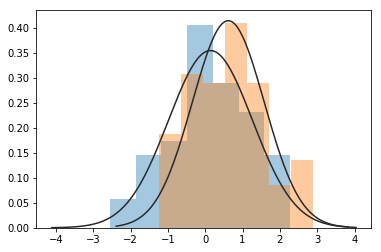

In [57]:
N_1 = 50; mu_1 = 0; sigma_1 = 1
N_2 = 100; mu_2 = 0.5; sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)

In [58]:
sp.stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=-2.6826951236616963, pvalue=0.0081339709157226582)

데이터의 갯수를 50개와 100개로 증가시킨 경우에 유의 확률은 0.8%로 감소하였다. 따라서 두 확률 분포의 기댓값이 일치한다는 귀무 가설은 기각할 수 있다.